In [1]:
import sys
sys.path.append("..")
from utils import fit_and_plot, montecarlo_estimator
import numpy as np
import pandas as pd

In [2]:
class ExpModel:
    def forward(self, T, a, b):
        return a*T+b
    def backward(self, T, a, b):
        return a
expmodel = ExpModel()
df = pd.read_csv("data/exp 7 - Experiment 1 - Charles Law.csv", skiprows =1)
df

,Experiment Number,Piston Height (mm),Volume (mm**3),Temperature (C),"Error (V, mm**3)",Unnamed: 5,V/T,Unnamed: 7,Unnamed: 8,-,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,1,0.0,146600.0,0.4,1300,NaN,536.210680,4.758976,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.4
1,2,5.5,151162.8,9.3,1300,NaN,535.468650,4.608931,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,13.3
2,3,10.0,154896.0,16.4,1300,NaN,535.231514,4.495854,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,18.2
3,4,13.0,157384.8,22.9,1300,NaN,531.885096,4.397048,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,24.9
4,5,19.0,162362.4,32.2,1300,NaN,531.986894,4.263063,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.5,29.8
5,6,22.0,164851.2,38.6,1300,NaN,529.047497,4.175465,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,34.7
6,7,25.0,167340.0,42.4,1300,NaN,530.564363,4.125178,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5,39.9
7,8,27.0,168999.2,46.6,1300,NaN,528.783479,4.070945,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,46.3


[[4.82698130e+02 2.96389305e+01]
 [1.46601129e+05 8.99978447e+02]]


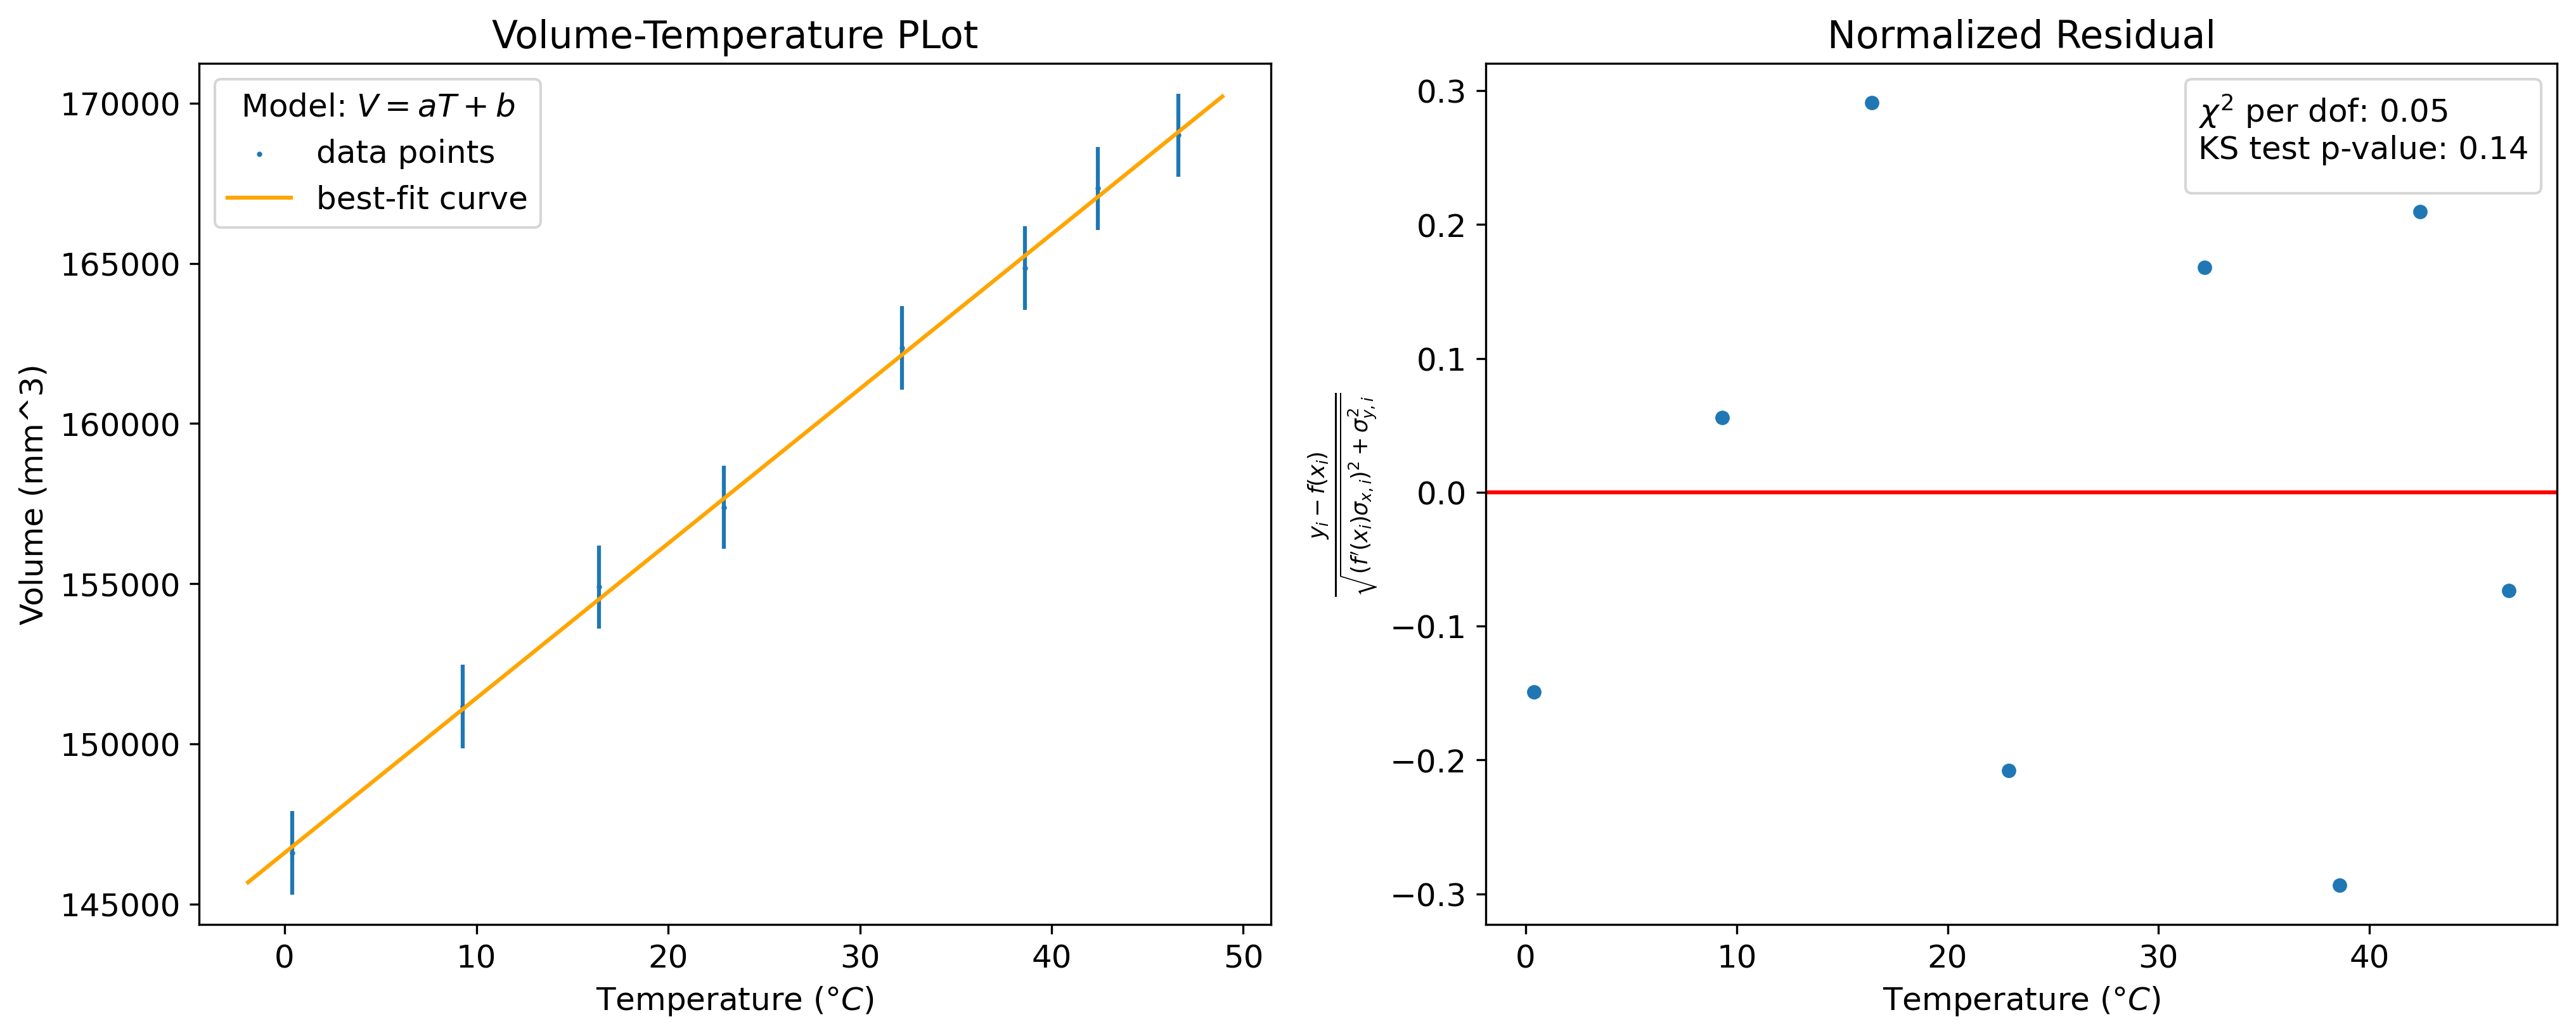

In [8]:
params = fit_and_plot(
    expmodel,
    df["Temperature (C)"], 
    df["Volume (mm**3)"],
    np.ones_like(df["Temperature (C)"])*0.1,
    df["Error (V, mm**3)"],
    2,
    None,
    r"Temperature ($\degree C$)",
    r"Volume (mm^3)",
    "Volume-Temperature PLot",
    r"$V=aT+b$",
    True,
    );

In [13]:
print(1.46601129e+05/4.82698130e+02)
303.7118229565132*np.sqrt((2.96389305e+01/4.82698130e+02)**2 + (8.99978447e+02/1.46601129e+05)**2)

303.7118229565132


18.741674271575707

In [47]:
class ExpModel:
    def forward(self, dlnv, a, b):
        return a*dlnv+b
    def backward(self, dlnv, a, b):
        return a
expmodel = ExpModel()
df = pd.read_csv("data/exp 7 - Experiment 2 - Under Pressure.csv", skiprows =1)
df

,Experiment #,Weight on Piston,Total Weight,Net Pressure (Pa),Piston Height,Volume,DP/P,DV/V
0,1,0,48.5,100573.3414,49,187250.4,-2.470755e-10,0.000000
1,2,20,68.5,100809.7708,48,186420.8,2.345303e-03,-0.004450
2,3,100,148.5,101755.4885,46,184761.6,1.161753e-02,-0.013470
3,4,150,198.5,102346.5621,44,183102.4,1.732565e-02,-0.022654
4,5,300,348.5,104119.7829,39,178954.4,3.406117e-02,-0.046358
5,6,400,448.5,105301.9300,35,175636.0,4.490505e-02,-0.066128
6,7,500,548.5,106484.0772,31,172317.6,5.550817e-02,-0.086659


[[-0.64770738  0.20979479]
 [ 0.00150558  0.00980241]]


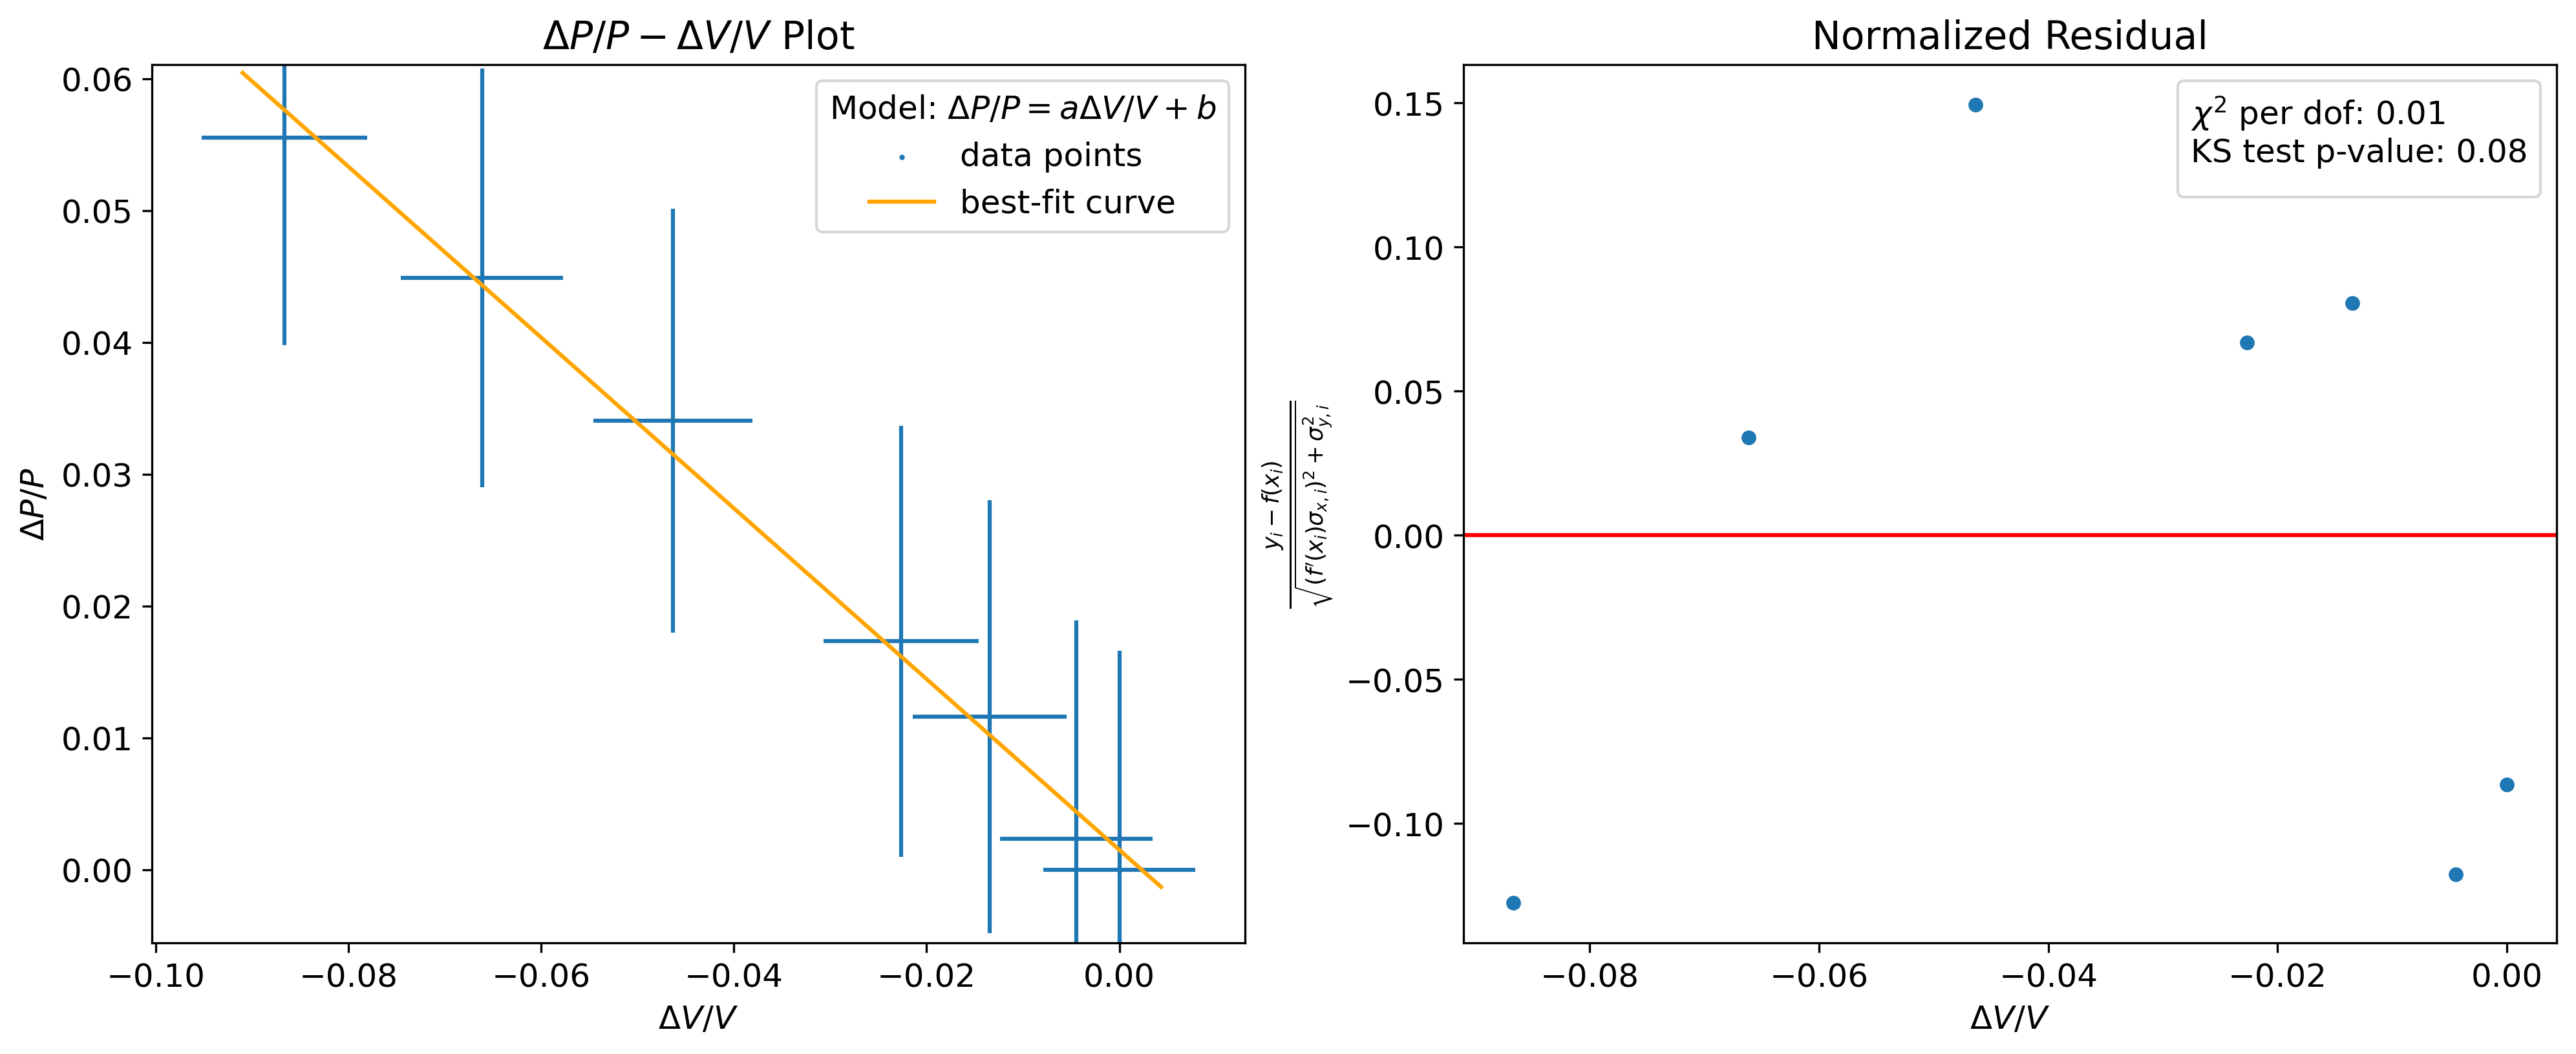

In [50]:
sig_x = np.sqrt((1044*(df["Volume"] - 187250.4)/df["Volume"]**2)**2 + 2*(1044/(df["Volume"]))**2)
sig_y = np.sqrt((9.8*0.1/829*10**6*(df["Net Pressure (Pa)"] - 100573.3414)/df["Net Pressure (Pa)"]**2)**2 + 2*(9.8*0.1/829*10**6/(df["Net Pressure (Pa)"]))**2)
fit_and_plot(
    expmodel,
    df["DV/V"], 
    df["DP/P"],
    sig_x,
    sig_y,
    2,
    None,
    r"$\Delta V/V$",
    r"$\Delta P/P$",
    r"$\Delta P/P-\Delta V/V$ Plot",
    r"$\Delta P/P=a\Delta V/V+b$",
    True,
    );

[[18657.4425733     90.58722083]]


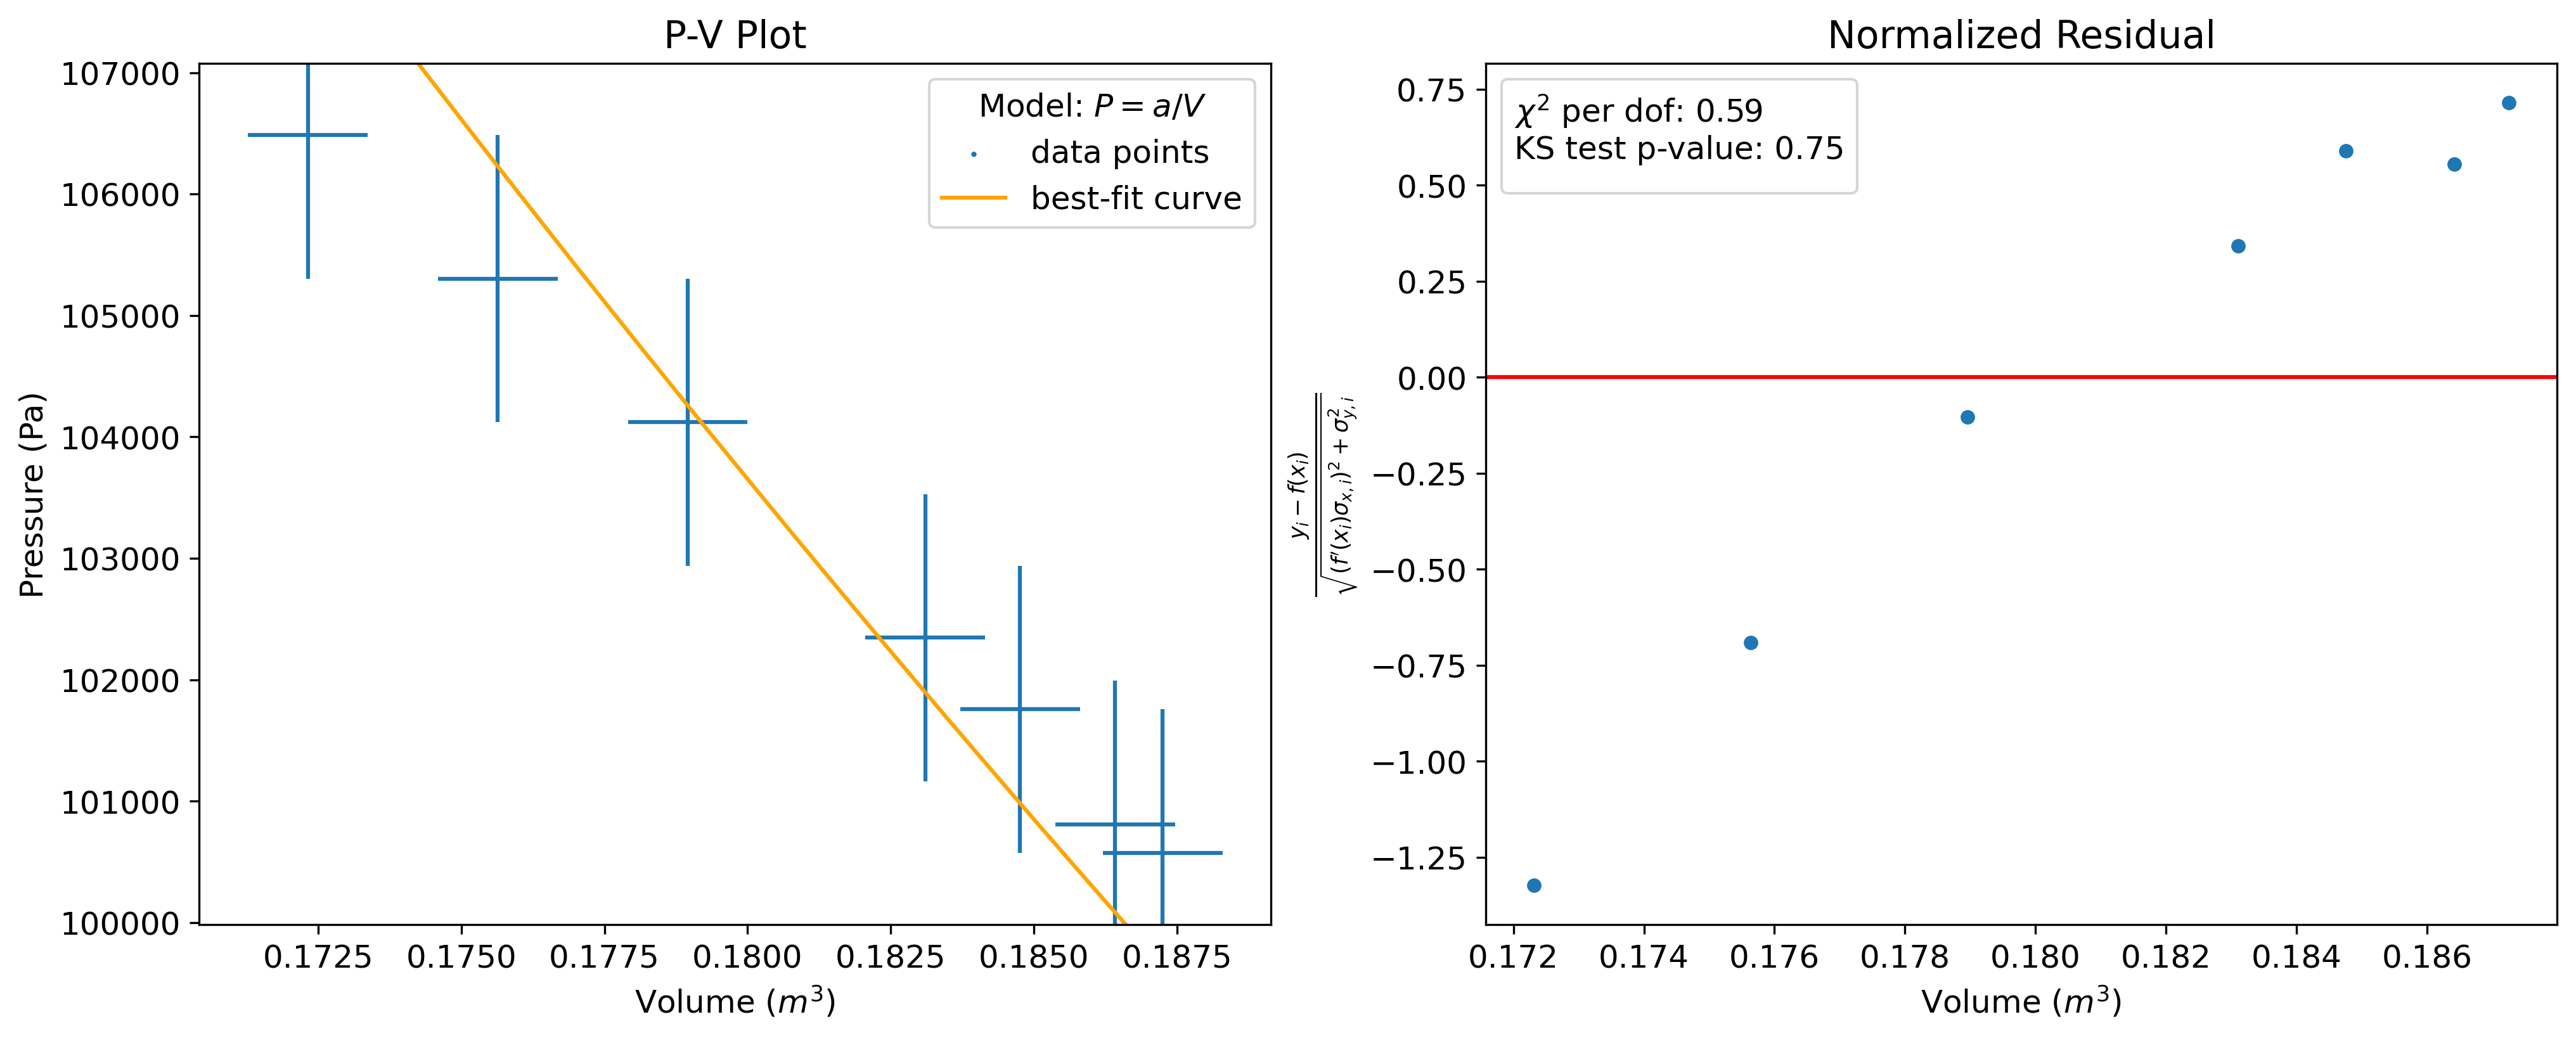

In [34]:
class ExpModel2:
    def forward(self, V, a):
        return a/V
    def backward(self, V, a):
        return a/V**2
expmodel2 = ExpModel2()
fit_and_plot(
    expmodel2,
    df["Volume"]/10**6, 
    df["Net Pressure (Pa)"],
    1044*np.ones_like(df["Volume"])/10**6,
    9.8*0.1/829*10**6*np.ones_like(df["Volume"]),
    1,
    None,
    r"Volume ($m^3$)",
    "Pressure (Pa)",
    "P-V Plot",
    r"$P=a/V$",
    True,
    );

In [55]:
df = pd.read_csv("data/exp 7 - Experiment 3 - Heat Engine.csv", skiprows =1)[:12]
df

,Tc,Th,T Loaded,T Unloaded,M (g),Hinit,H after 1,H after 2,H after 3,H after 4,...,Unloaded Leakage,Missing Volume,Mtot,P1,P2,P3,P4,Wmec,Wthermo,Q
0,0.4,45.5,34.97,21.26,50.0,14.0,12.0,32.0,39.0,14.0,...,0.016667,1.374292,98.5,101472.9267,102063.5728,102063.5728,101472.9267,0.017375,0.01221508649,6.526446866
1,0.4,46.0,30.71,28.28,50.0,11.0,10.0,35.0,37.0,10.0,...,0.016667,-828.232958,98.5,101472.9267,102063.5728,102063.5728,101472.9267,0.023167,0.01270359274,7.578271352
2,0.4,45.9,28.76,24.96,50.0,10.0,9.0,34.0,35.0,9.0,...,0.016667,-828.345167,98.5,101472.9267,102063.5728,102063.5728,101472.9267,0.023167,0.01221497982,7.49347578
3,0.4,46.0,24.30,20.75,100.0,18.0,15.0,40.0,43.0,17.0,...,0.016667,-828.241667,148.5,101472.9267,102654.2189,102654.2189,101472.9267,0.032017,0.02435967857,7.706319361
4,0.4,46.2,29.35,19.33,100.0,17.0,14.0,39.0,42.0,16.0,...,0.016667,-828.054917,148.5,101472.9267,102654.2189,102654.2189,101472.9267,0.032017,0.02435992569,7.706402989
5,0.4,46.1,20.28,22.83,100.0,15.0,12.0,37.0,41.0,14.0,...,0.016667,-828.374500,148.5,101472.9267,102654.2189,102654.2189,101472.9267,0.032017,0.02533382142,7.791832851
6,0.4,46.0,24.08,26.78,150.0,28.0,24.0,49.0,53.0,26.0,...,0.016667,-1657.750333,198.5,101472.9267,103244.8650,103244.8650,101472.9267,0.040851,0.0364345821,7.834601283
7,0.4,46.2,26.60,18.75,150.0,26.0,22.0,47.0,51.0,25.0,...,0.016667,-828.179167,198.5,101472.9267,103244.8650,103244.8650,101472.9267,0.040851,0.03643476655,7.834665586
8,0.4,46.3,26.55,20.28,150.0,25.0,20.0,45.0,49.0,23.0,...,0.016667,-1657.755750,198.5,101472.9267,103244.8650,103244.8650,101472.9267,0.038906,0.03497745011,7.834691668
9,0.4,46.1,17.96,14.95,200.0,30.0,22.0,45.0,52.0,27.0,...,0.016667,-2487.428333,248.5,101472.9267,103835.5111,103835.5111,101472.9267,0.036529,0.04262830031,7.533313686


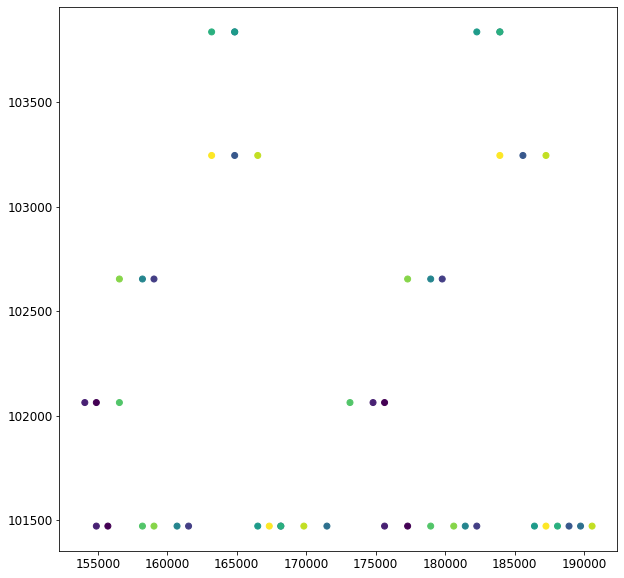

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10))
color = np.arange(12)[np.random.permutation(12)]
plt.scatter(df["V1"], df["P1"], c = color)
plt.scatter(df["V2"], df["P2"], c = color)
plt.scatter(df["V3"], df["P3"], c = color)
plt.scatter(df["V4"], df["P4"], c = color)

In [53]:
1/829*10**6*9.8/1000

11.821471652593488